<a href="https://www.kaggle.com/code/sainithinartham/notebook7bdb285a31?scriptVersionId=112993194" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Results analysis from BERT Model
### 230T2 - Megha Raveendran, Renee Reynolds, Derui Chen, Loïc Diridollou, Shiva Kandi

In [20]:
import pandas as pd
import datetime as dt

In [13]:
# importing the headlines data set
df = pd.read_csv('/kaggle/input/datanew1/data.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

# importing the results from the BERT model
df_res = pd.read_csv('/kaggle/input/probesnew/probs.csv')

In [14]:
# checking on the size
df_res.shape, df.shape

((33658, 3), (33658, 4))

In [16]:
# including the results of BERT into our main dataframe
df['label'] = df_res['1']

In [17]:
df.Date = pd.to_datetime(df.Date)

In [18]:
new_df = df.resample('3D', on = 'Date').max()

In [21]:
new_df = df.resample('D', on='Date').mean().fillna(method = 'ffill')
new_dff = new_df[new_df.index >= dt.datetime(2012, 1, 1)]

In [27]:
!pip install pandas_datareader

In [30]:
import pandas_datareader.data as pdt
tickers = ['^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2013-01-01'
end_date = '2013-11-20'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = pdt.DataReader('^GSPC', 'yahoo', start_date, end_date)

In [31]:
dff = new_dff.merge(panel_data[['Close']], how = 'right', left_on = new_dff.index, right_on = panel_data[['Close']].index)
dff.set_index('key_0', inplace = True)
y = dff['Close'].values

# parameters to modify to create the moving average: k
k = 5
dff = dff.fillna(method = 'ffill').rolling(k).mean()
dff.dropna(inplace = True)

In [33]:
# choosing only the values in the second test set (2013 only)
import numpy as np
dff = dff.loc['2013-01-02':]
np.corrcoef(dff['label'], y[-len(dff):])

array([[1.       , 0.2549246],
       [0.2549246, 1.       ]])

Text(0, 0.5, 'Sentiment Factor')

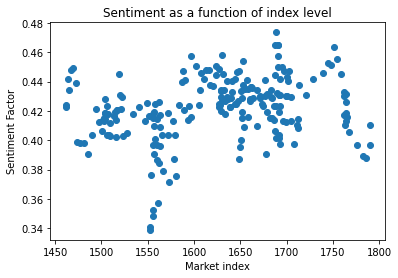

In [44]:
import matplotlib.pyplot as plt
plt.scatter(dff['Close'].values, dff['label'].values)
plt.title("Sentiment as a function of index level")
plt.xlabel('Market index')
plt.ylabel('Sentiment Factor')

In [38]:
# regression of the index level on the sentiment value
# trying to prove significancy
import statsmodels.regression.linear_model as sm
X = dff['label']
Y = dff['Close']
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          5.576e+04
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                   1.31e-266
Time:                        10:42:59   Log-Likelihood:                         -1335.6
No. Observations:                 221   AIC:                                      2673.
Df Residuals:                     220   BIC:                                      2677.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
label       3844.7443     16.282    236.128      0.000    3812.655    3876.834
==============================================================================
Omnibus:                        6.408   Durbin-Watson:                   0.178
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.123
Skew:                           0.392   Prob(JB):                       0.0468
Kurtosis:                       3.225   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
results.pvalues

label    1.309389e-266
dtype: float64

Text(0.5, 1.0, 'Correlation between sentimental factor and index level')

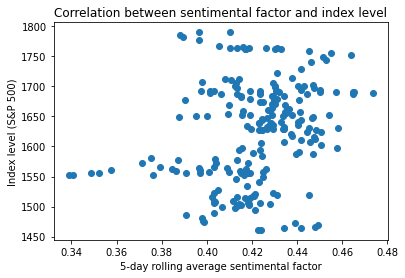

In [40]:
plt.scatter(dff['label'], Y)
plt.xlabel("5-day rolling average sentimental factor")
plt.ylabel("Index level (S&P 500)")
plt.title("Correlation between sentimental factor and index level")

Text(0, 0.5, 'Return Value')

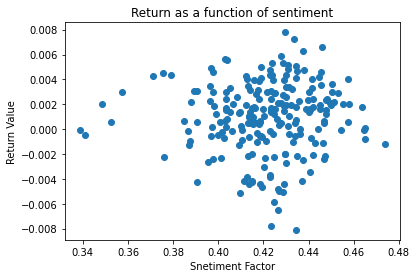

In [45]:
plt.scatter(dff['label'], dff['Return'])
plt.title("Return as a function of sentiment")
plt.xlabel('Snetiment Factor')
plt.ylabel('Return Value')

In [47]:
dff

,Unnamed: 0.1,Return,label,Close
key_0,,,,
2013-01-08,118744.9,0.004363,0.423965,1461.460010
2013-01-09,118803.9,-0.000186,0.422755,1461.180005
2013-01-10,118863.0,0.001751,0.441792,1463.730005
2013-01-11,118918.6,0.000768,0.434325,1464.846021
2013-01-14,118973.9,0.001207,0.447742,1466.604028
...,...,...,...,...
2013-11-14,132783.0,0.004943,0.396647,1776.561987
2013-11-15,132843.0,0.003101,0.389307,1782.076001
2013-11-18,132904.9,0.002217,0.387893,1786.004004


Text(0.5, 1.0, 'Plot of the sentiment over time')

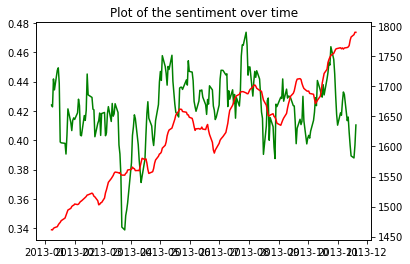

In [54]:
#panel_data.loc['2012-01-02':]['Close']
ax=plt.subplot()
ax.plot(dff['label'], color='green')
ax2=ax.twinx()
ax2.plot(dff['Close'], color='red')
plt.title("Plot of the sentiment over time")

# Second part: results

In [ ]:
# importing the headlines data set
df = pd.read_csv('data.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

# importing the results from the BERT model
df_res = pd.read_csv('probs.csv')

In [ ]:
# checking on the size
df_res.shape, df.shape

In [ ]:
# including the results of BERT into our main dataframe
['label'] = df_res['1']

In [ ]:
df.Date = pd.to_datetime(df.Date)

In [ ]:
new_df = df.resample('3D', on = 'Date').max()

In [ ]:
new_df = df.resample('D', on='Date').mean().fillna(method = 'ffill')
new_dff = new_df[new_df.index >= dt.datetime(2012, 1, 1)]

In [ ]:
tickers = ['^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2013-01-01'
end_date = '2013-11-20'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('^GSPC', 'yahoo', start_date, end_date)

In [ ]:
dff = new_dff.merge(panel_data[['Close']], how = 'right', left_on = new_dff.index, right_on = panel_data[['Close']].index)
dff.set_index('key_0', inplace = True)
y = dff['Close'].values

# parameters to modify to create the moving average: k
k = 5
dff = dff.fillna(method = 'ffill').rolling(k).mean()
dff.dropna(inplace = True)

In [ ]:
# choosing only the values in the second test set (2013 only)
dff = dff.loc['2013-01-02':]
np.corrcoef(dff['label'], y[-len(dff):])

In [ ]:
plt.scatter(dff['Close'].values, dff['label'].values)
plt.title("Sentiment as a function of index level")

In [ ]:
# regression of the index level on the sentiment value
# trying to prove significancy
X = dff['label']
Y = dff['Close']
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

In [ ]:
results.pvalues

In [ ]:
plt.scatter(dff['label'], Y)
plt.xlabel("5-day rolling average sentimental factor")
plt.ylabel("Index level (S&P 500)")
plt.title("Correlation between sentimental factor and index level")

In [ ]:
plt.scatter(dff['label'], dff['Return'])
plt.title("Return as a function of sentiment")

In [ ]:
#panel_data.loc['2012-01-02':]['Close']
dff['label'].plot()
plt.title("Plot of the sentiment over time")

# Second part: results

In [ ]:
# importing the headlines data set
df = pd.read_csv('data.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

# importing the results from the BERT model
df_res = pd.read_csv('probs.csv')

In [ ]:
# checking on the size
df_res.shape, df.shape

In [ ]:
# including the results of BERT into our main dataframe
['label'] = df_res['1']

In [ ]:
df.Date = pd.to_datetime(df.Date)

In [ ]:
new_df = df.resample('3D', on = 'Date').max()

In [ ]:
new_df = df.resample('D', on='Date').mean().fillna(method = 'ffill')
new_dff = new_df[new_df.index >= dt.datetime(2012, 1, 1)]

In [ ]:
tickers = ['^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2013-01-01'
end_date = '2013-11-20'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('^GSPC', 'yahoo', start_date, end_date)

In [ ]:
dff = new_dff.merge(panel_data[['Close']], how = 'right', left_on = new_dff.index, right_on = panel_data[['Close']].index)
dff.set_index('key_0', inplace = True)
y = dff['Close'].values

# parameters to modify to create the moving average: k
k = 5
dff = dff.fillna(method = 'ffill').rolling(k).mean()
dff.dropna(inplace = True)

In [ ]:
# choosing only the values in the second test set (2013 only)
dff = dff.loc['2013-01-02':]
np.corrcoef(dff['label'], y[-len(dff):])

In [ ]:
plt.scatter(dff['Close'].values, dff['label'].values)
plt.title("Sentiment as a function of index level")

In [ ]:
# regression of the index level on the sentiment value
# trying to prove significancy
X = dff['label']
Y = dff['Close']
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

In [ ]:
results.pvalues

In [ ]:
plt.scatter(dff['label'], Y)
plt.xlabel("5-day rolling average sentimental factor")
plt.ylabel("Index level (S&P 500)")
plt.title("Correlation between sentimental factor and index level")

In [4]:
plt.scatter(dff['label'], dff['Return'])
plt.title("Return as a function of sentiment")

NameError: name 'plt' is not defined

In [ ]:
#panel_data.loc['2012-01-02':]['Close']
dff['label'].plot()
plt.title("Plot of the sentiment over time")